<a href="https://colab.research.google.com/github/douniagh/MyApplication-/blob/main/Training4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from sklearn.datasets import make_regression
 from sklearn.feature_selection import RFECV
 from sklearn import linear_model
 from sklearn import datasets
 import pandas as pd 
 import numpy as np
 from sklearn.preprocessing import LabelEncoder
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.preprocessing import MinMaxScaler
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split, cross_val_score
 from sklearn.decomposition import PCA
 from sklearn import tree
 from sklearn.naive_bayes import GaussianNB
 from sklearn.linear_model import LogisticRegression
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.preprocessing import RobustScaler
 from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score
 from collections import Counter
 from sklearn.utils import shuffle
 import seaborn as sns
# from fancyimpute import IterativeImputer
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder
import dask.dataframe as dd

# Define the file path
file_path = '/content/drive/MyDrive/filtered_dataset.csv'

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Read the CSV file into a Dask DataFrame, skipping rows with parsing errors
df = dd.read_csv(file_path, dtype=str)

# Apply LabelEncoder to non-numeric columns in the DataFrame
encoder = LabelEncoder()

# Define a function to apply label encoding to a partition
def encode_partition(partition):
    for col in partition.columns:
        # Skip the label column
        if col == 'Attack_label':
            continue
        # Apply LabelEncoder to non-numeric columns
        if partition[col].dtype == 'object':
            partition[col] = encoder.fit_transform(partition[col])
    return partition

# Apply label encoding to each partition in the DataFrame
encoded_df = df.map_partitions(encode_partition)

# Compute the encoded DataFrame
encoded_df = encoded_df.compute()

# Print the encoded DataFrame
print(encoded_df.head())

In [2]:
import dask.dataframe as dd
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/cleaned_df.csv'

df = pd.read_csv(file_path,low_memory= False)
df.tail()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
19823169,197260,6,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19823170,197261,7,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19823171,197262,6,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19823172,197263,7,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19823173,197264,6,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

def identify_useless_columns(df, threshold=0.9):

    # Identify columns with constant values
    constant_cols = df.columns[df.nunique() == 1].tolist()

    # Identify columns with high unique value count
    unique_cols = df.columns[df.nunique() > len(df) * threshold].tolist()

    # Identify columns with zero variance
    zero_var_cols = df.columns[df.var() == 0].tolist()

    # Create a combined list of potentially useless columns
    useless_cols = constant_cols + unique_cols + zero_var_cols

    return useless_cols

# Identify potentially useless columns
useless_columns = identify_useless_columns(df)

print("Potentially useless columns:")
print(useless_columns)


Potentially useless columns:
[]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(method='spearman')
fig = plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True)

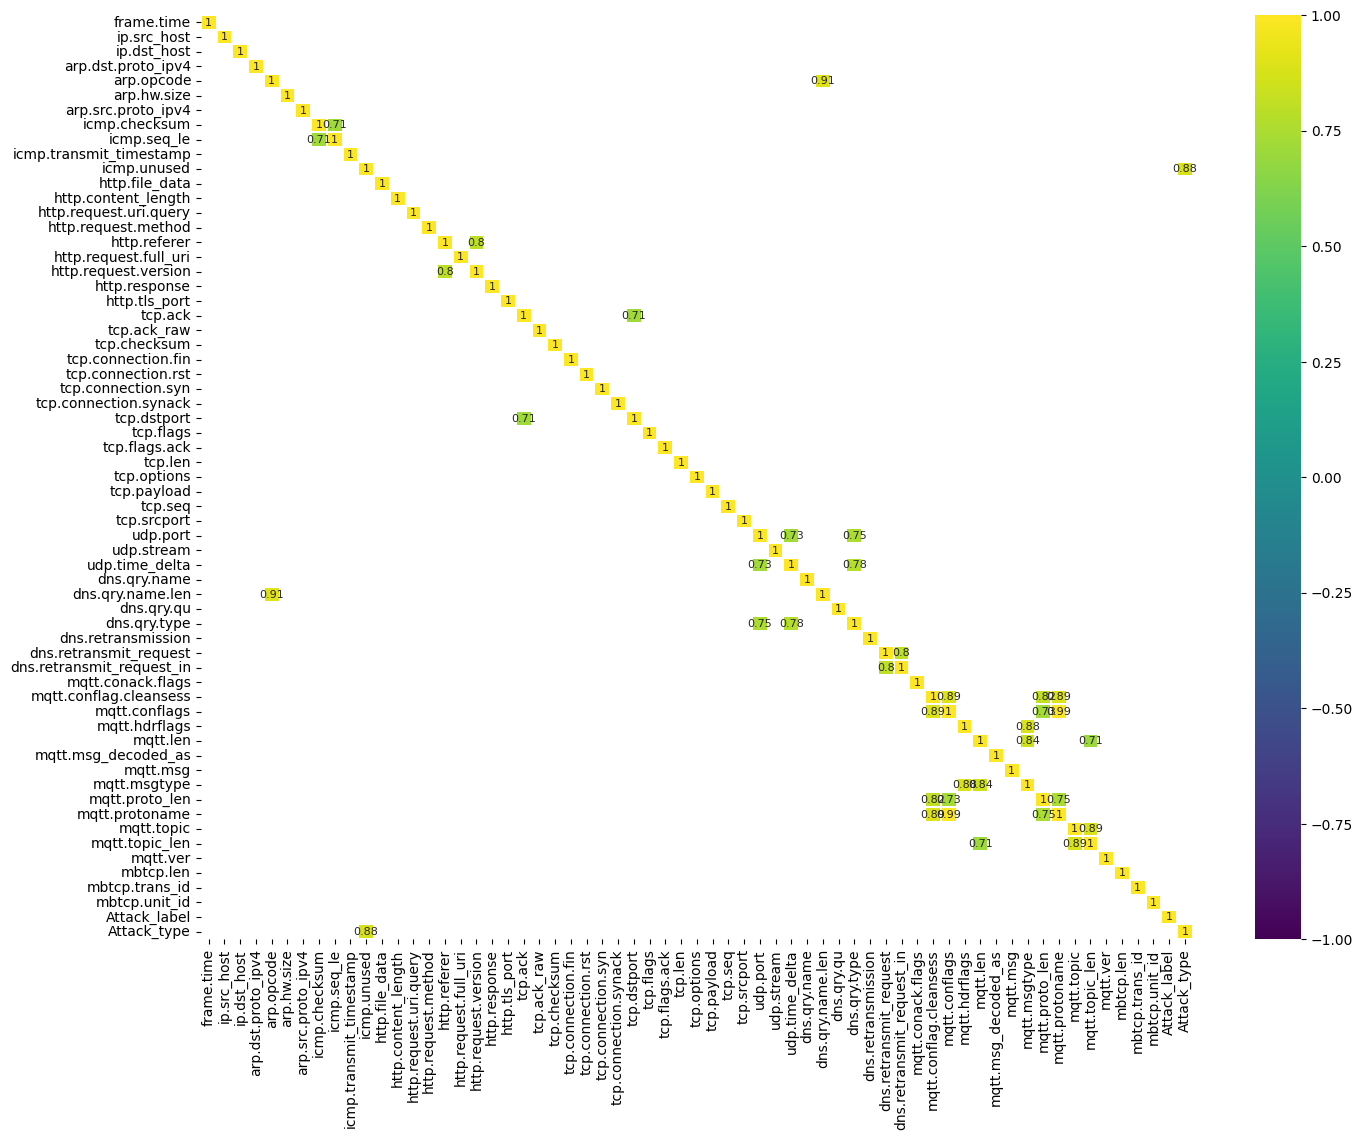

In [ ]:
# Analysing feature to feature relationship

corr = df.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8});

<Axes: >

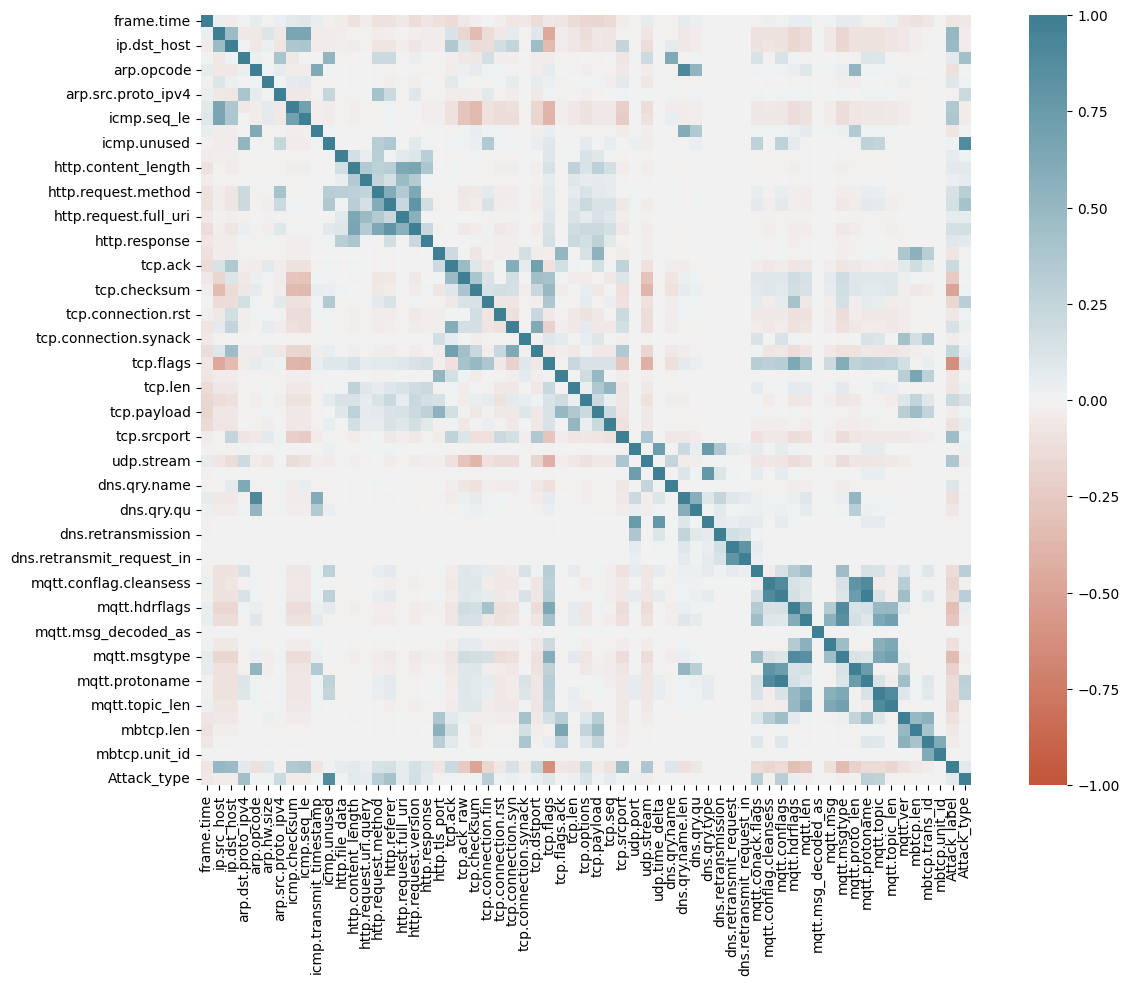

In [ ]:
corr_matrix = df.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True) 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

features = SelectKBest(score_func=chi2, k=X_train.shape[1])

#fit features to the training dataset
fit = features.fit(X_train, y_train)

In [ ]:
# plot the score associated with each feature
plt.bar([i for i in range(len(features.scores_))], features.scores_)
plt.xticks([i for i in range(len(features.scores_))], df.columns)
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.savefig('features.png', dpi=300)

In [ ]:

# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= df.corr()
corr_y = abs(corr['Attack_label'])
highest_corr = corr_y[corr_y > 0.5]
highest_corr.sort_values(ascending=True)

tcp.srcport     0.467803
ip.dst_host     0.481225
tcp.checksum    0.489099
ip.src_host     0.506805
tcp.flags       0.624720
Attack_label    1.000000
Name: Attack_label, dtype: float64

In [6]:
corr= df.corr()

In [7]:
def get_abs_correlations(df, t):
    labels_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]-2):
        for j in range(0, i+1):
            labels_to_drop.add((cols[i], cols[j]))
    
    c = corr.abs().unstack().drop(labels=labels_to_drop).sort_values(ascending=False)
    return c[c > t]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_abs_correlations(df, 0.8))

Attack_type             Attack_type                  1.000000
Attack_label            Attack_label                 1.000000
mqtt.conflags           mqtt.protoname               0.993496
arp.opcode              dns.qry.name.len             0.905040
mqtt.conflag.cleansess  mqtt.conflags                0.894442
                        mqtt.protoname               0.891857
mqtt.topic              mqtt.topic_len               0.885601
mqtt.hdrflags           mqtt.msgtype                 0.884298
icmp.unused             Attack_type                  0.879147
Attack_type             icmp.unused                  0.879147
mqtt.len                mqtt.msgtype                 0.844017
mqtt.conflag.cleansess  mqtt.proto_len               0.819309
dns.retransmit_request  dns.retransmit_request_in    0.801132
dtype: float64


In [ ]:
# finding the attributes which have less than 0.5 correlation with encoded attack label attribute 
corr= df.corr()
corr_y = abs(corr['Attack_type'])
highest_corr = corr_y[corr_y < 0.25 ]
highest_corr.sort_values(ascending=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
import pandas as pd

# Extract 10 columns
selected_columns = ['ip.src_host','ip.dst_host','arp.dst.proto_ipv4',
           'arp.opcode','arp.hw.size','arp.src.proto_ipv4','Attack_label']
df_one = df[selected_columns]

# Print the extracted columns
df_one.head()


,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,Attack_label
0,72611,32675,0,0,0,0,1
1,29380,32675,0,0,0,0,1
2,100682,32675,0,0,0,0,1
3,83941,32675,0,0,0,0,1
4,91591,32675,0,0,0,0,1


In [ ]:
import dask.dataframe as dd

# Get the data types of each column
column_types = df.dtypes

# Print the column types
print(column_types)


In [ ]:
# Drop rows with NaN values
df_cleaned = df.dropna()

In [ ]:
import dask.dataframe as dd

# Count the number of rows with NaN values
num_rows_with_nan = df.isna().sum().sum().compute()

# Print the number of rows with NaN values
print("Number of rows with NaN values:", num_rows_with_nan)


Number of rows with NaN values: 0


In [ ]:
import dask.dataframe as dd

# Specify the output file path
output_file_path = '/content/drive/MyDrive/cleaned_df.csv'

# Merge all partitions into a single partition
df_cleaned = df_cleaned.repartition(npartitions=1)

# Save the DataFrame to a CSV file
df_cleaned.to_csv(output_file_path, index=False,single_file=True)

['/content/drive/MyDrive/cleaned_df.csv']

In [ ]:
# Convert all columns to int32
df_cleaned = df_cleaned.astype('int32')

In [ ]:
df_cleaned.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,0,72611,32675,0,0,0,0,19187,7091,0,...,0,0,0,0,0,0,0,0,1,0
1,1,29380,32675,0,0,0,0,18931,7102,0,...,0,0,0,0,0,0,0,0,1,0
2,2,100682,32675,0,0,0,0,18675,7114,0,...,0,0,0,0,0,0,0,0,1,0
3,3,83941,32675,0,0,0,0,18419,7125,0,...,0,0,0,0,0,0,0,0,1,0
4,4,91591,32675,0,0,0,0,18163,7136,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
import dask.dataframe as dd

# Convert all columns to int32
df = df.astype('int32')

# Print the updated data types
print(df.dtypes)


In [ ]:
import dask.dataframe as dd

# Get the data types of each column
column_types = df.dtypes

# Print the column types
print(column_types)


In [ ]:
import dask.dataframe as dd

# Assuming you have a Dask DataFrame named 'df'
column_names = []
for column in df.columns:
    if df[column].nunique().compute() == 1:
        column_names.append(column)

print(f"Columns with the same value: {column_names}")

Columns with the same value: []


In [ ]:
import dask.dataframe as dd

# Shuffle the DataFrame
shuffled_df = df.sample(frac=1)

# Print the shuffled DataFrame
print(shuffled_df.head())

In [ ]:
!pip install dask dask-ml

In [ ]:
# Drop duplicates
shuffled_df = shuffled_df.drop_duplicates()

# Handle missing values
clean_df = shuffled_df.dropna()

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Step 1: Load and preprocess the dataset
# data = dd.read_csv('intrusion_dataset.csv')

X = df.drop('Attack_label', axis=1)
y = df['Attack_label']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
corr = clean_df.drop(columns=['Attack_label']).corr()

In [ ]:
def get_abs_correlations(clean_df, t):
    labels_to_drop = set()
    cols = clean_df.columns.drop(['Attack_label'])
    for i in range(0, df.shape[1]-2):
        for j in range(0, i+1):
            labels_to_drop.add((cols[i], cols[j]))
    
    c = corr.abs().unstack().drop(labels=labels_to_drop).sort_values(ascending=False)
    return c[c > t]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_abs_correlations(df, 0.8))

KeyError: ignored

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

features = SelectKBest(score_func=chi2, k=X_train.shape[1])

# Fit features to the training dataset
fit = features.fit(X_train, y_train['Attack_label'])

In [ ]:
# plot the score associated with each feature
plt.bar([i for i in range(len(features.scores_))], features.scores_)
plt.xticks([i for i in range(len(features.scores_))], dataset_copy.columns)
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.savefig('features.png', dpi=300)

In [ ]:

corr_matrix = clean_df.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,vmax=0.9,square = True) 

In [ ]:
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix incrementally
corr = clean_df.corr()

# Calculate the absolute correlation values with the target variable
corr_with_target = abs(corr['Attack_label'])

# Convert Dask DataFrame to pandas DataFrame
corr_with_target = corr_with_target.compute()

# Sort the correlation values in descending order
sorted_corr = corr_with_target.sort_values(ascending=False)

# Limit the number of partitions based on available memory
memory_limit = 20  # GB
max_partition_size = int(memory_limit * 1e9 / 8)  # Each partition is assumed to consume 8 bytes
sorted_corr = dd.from_pandas(sorted_corr, npartitions=47).repartition(partition_size=max_partition_size)

# Retrieve the correlation values and column names
correlation_values = sorted_corr.values.compute(scheduler='processes')
columns = sorted_corr.index.compute(scheduler='processes')

# Plot the correlation values
plt.rcParams['figure.figsize'] = (10, 12)
plt.barh(columns, correlation_values)
plt.xlabel('Correlation with Target Variable')
plt.ylabel('Columns')
plt.title('Feature Importance: Correlation with Target Variable')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
import dask.dataframe as dd
from sklearn.ensemble import RandomForestClassifier
import joblib
from matplotlib import pyplot as plt
import numpy as np

# Assuming X_train and y_train are Dask DataFrames
# Load the Dask DataFrame from your data source
X_train = dd.from_pandas(X_train, npartitions=1)
y_train = dd.from_pandas(y_train, npartitions=1)

# Create a Dask RandomForestClassifier
rfc = RandomForestClassifier()

# Fit random forest classifier on the training set
rfc.fit(X_train, y_train);

# Extract important features
score = np.round(rfc.feature_importances_, 3)
importances = dd.from_pandas(pd.DataFrame({'feature': refclasscol, 'importance': score}), npartitions=1)
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Compute and visualize the importances
importances = importances.compute()
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()
plt.show()


In [ ]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc= RandomForestClassifier (n_estimators=100, random_state =0)
# Fit the model
rfc.fit (X_train, y_train)
# Predict the test result
y_pred= rfc.predict (X_test)
# Checking the accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees: {0:0}'. format(accuracy_score(y_test, y_pred)))


In [ ]:
import dask.dataframe as dd

# Specify the output file path
output_file_path = '/content/drive/MyDrive/sample.csv'

# Calculate the total number of rows in the DataFrame
total_rows = len(clean_df)

# Specify the percentage of rows to save (e.g., 10%)
percentage = 0.1

# Calculate the number of rows to save
num_rows = int(total_rows * percentage)

# Specify the chunk size
chunk_size = 10000  # Adjust this value according to your memory capacity

# Open the output file in write mode
with open(output_file_path, 'w') as f:
    # Write the header to the file
    clean_df.head(1).to_csv(f, index=False)

    # Iterate over the DataFrame in chunks
    for i in range(0, num_rows, chunk_size):
        # Get the chunk of rows
        chunk = clean_df[i:i+chunk_size]

        # Save the chunk to the output file
        chunk.to_csv(output_file_path, index=False, header=False, mode='a')



In [ ]:
import dask.dataframe as dd

 #Specify the output file path
output_file_path = '/content/drive/MyDrive/sample.csv'

# Get the number of rows in the DataFrame
num_rows = len(clean_df)

# Calculate the number of rows to sample (10%)
num_sampled_rows = int(num_rows * 0.1)

# Sample the DataFrame using the head() method
df_sampled = clean_df.head(num_sampled_rows)

# Convert the sampled DataFrame to a Dask DataFrame
df_sampled = dd.from_pandas(df_sampled, npartitions=1)

# Save the sampled DataFrame to a CSV file
df_sampled.to_csv(output_file_path, index=False,single_file=True)


In [ ]:
import dask.dataframe as dd

# Specify the percentage of rows to use (e.g., 10%)
percentage = 0.1

# Calculate the number of rows to use
num_rows = int(len(clean_df) * percentage)

# Use 10% of the rows
subset = clean_df.iloc[:num_rows].compute()

# Print the subset DataFrame
subset.head()


In [ ]:

# Update values based on conditions
df['Attack_label'] = df['Attack_label'].where(df['Attack_label'] == "0", 'Attack')
df['Attack_label'] = df['Attack_label'].where(df['Attack_label'] != '1', 'Normal')

In [ ]:
pie_plot(df, ['Attack_type', 'Attack_label'], 1, 2)

In [ ]:
import dask.dataframe as dd
import dask_ml.model_selection as dcv
import dask_ml.metrics as dm
import dask_ml.preprocessing as dp
from dask_ml.wrappers import Incremental
from sklearn.ensemble import RandomForestClassifier

# Step 3: Define a function for fitting and predicting on smaller increments
def fit_predict_increment(X, y):
    # Initialize the RF estimator with a machine learning model
    rf = RandomForestClassifier(random_state=0)
    
    # Wrap the RF estimator with Incremental
    rf_incremental = Incremental(rf, scoring='accuracy')
    
    # Fit and predict incrementally on smaller increments of the training set
    chunk_size = 1000
    num_chunks = len(X) // chunk_size + 1
    
    y_pred_chunks = []
    for i in range(num_chunks):
        start = i * chunk_size
        end = start + chunk_size
        X_chunk = X[start:end]
        y_chunk = y[start:end]
        
        # Fit the model incrementally on the current chunk
        rf_incremental.partial_fit(X_chunk, y_chunk, classes=np.unique(y))
        
        # Predict on the test set using the current chunk
        y_pred_chunk = rf_incremental.predict(X_test).astype(int)
        y_pred_chunks.append(y_pred_chunk)
    
    # Concatenate the predicted chunks
    return np.concatenate(y_pred_chunks)

# Step 4: Apply the fit_predict_increment function on increments of the training set
meta = ('y_pred', 'int')
y_pred = fit_predict_increment(X_train, y_train)

# Step 5: Compute evaluation metrics
rf_score = dm.accuracy_score(y_test, y_pred)
precision, recall, fscore, _ = dm.precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy of RF:', rf_score)
print('Precision of RF:', precision)
print('Recall of RF:', recall)
print('F1-score of RF:', fscore)

NameError: ignored

In [ ]:
# Step 3: Define a function for fitting and predicting on smaller partitions
def fit_predict_partition(partition):
    # Initialize the RF estimator with a machine learning model
    rf = RandomForestClassifier(random_state=0)
    
    # Fit the model on the partition
    rf.fit(partition[X_train.columns], partition[y_train.name])
    
    # Predict on the test set
    return rf.predict(X_test)

# Step 4: Apply the fit_predict_partition function on each partition of the training set
y_pred_partitions = X_train.map_partitions(fit_predict_partition, meta=('y_pred', 'int'))

# Step 5: Concatenate the predicted results into a single Dask Series
y_pred = y_pred_partitions.compute().reset_index(drop=True)

# Step 6: Compute evaluation metrics
rf_score = dm.accuracy_score(y_test, y_pred)
precision, recall, fscore, _ = dm.precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy of RF:', rf_score)
print('Precision of RF:', precision)
print('Recall of RF:', recall)
print('F1-score of RF:', fscore)

In [ ]:
!pip install numpy==1.24.3

In [ ]:
!pip cache purge

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import dask.dataframe as dd
import pandas as pd
import numpy as np

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Define the chunk size
chunk_size = 10000
encoded_df_clean = encoded_df.dropna()

# Iterate over each partition in the Dask DataFrame
scaled_partitions = []
for partition in encoded_df.to_delayed():
    # Convert the partition to a Pandas DataFrame
    partition_pd = partition.compute()
    
    # Split the partition into smaller chunks
    num_chunks = len(partition_pd) // chunk_size + 1
    partition_chunks = np.array_split(partition_pd, num_chunks)
    
    # Apply scaling to each chunk
    scaled_chunks = []
    for chunk in partition_chunks:
        scaled_chunk = scaler.fit_transform(chunk)
        scaled_chunk = pd.DataFrame(scaled_chunk, columns=chunk.columns)
        scaled_chunks.append(scaled_chunk)
    
    # Concatenate the scaled chunks back into a single DataFrame
    scaled_partition = pd.concat(scaled_chunks)
    
    # Append the scaled partition to the list
    scaled_partitions.append(scaled_partition)

# Concatenate the scaled partitions into a single Dask DataFrame
dataset_scaled = dd.concat(scaled_partitions)

# Print the scaled dataset
print(dataset_scaled)

In [ ]:
dataset_scaled.head()

In [ ]:
# Save the encoded DataFrame to a CSV file
shuffled_df.to_csv('/content/drive/MyDrive/shuffled.csv', index=False)

In [ ]:
!pip cache purge

In [ ]:
# Store the scaled dataset to a CSV file (single partition)
dataset_scaled.to_csv('/content/drive/MyDrive/scaled_df.csv', index=False, single_file=True)

['/content/drive/MyDrive/scaled_df.csv']

In [ ]:
import dask.dataframe as dd

# Calculate the number of unique values in each column
unique_counts = encoded_df.nunique().compute()

# Extract the column names with a single unique value
same_value_columns = unique_counts[unique_counts == 1].index.tolist()

# Print the column names with the same value for all rows
print(same_value_columns)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



In [ ]:
# Define the output file path
output_file_path = '/content/drive/MyDrive/dataset_scaled.csv.csv'

# Convert the dataset_scaled to a Pandas DataFrame
dataset_pd = dataset_scaled.compute()

# Convert the Pandas DataFrame to a Dask DataFrame with a single partition
dataset_dask = dd.from_pandas(dataset_pd, npartitions=1)

# Save the dataset to a CSV file
dataset_dask.to_csv(output_file_path, index=False, single_file=True)

# Print a confirmation message
print("Dataset saved to CSV file:", output_file_path)

In [ ]:
i = []
while True:
  i.append(i)

In [ ]:
# wait for few minutes, after that you will get a prompt that your notebook got crashed, do you want to increase ram ?

In [ ]:
# in the prompt click - yes

In [ ]:
# as you see the ram increase from 12GB to 25GB

In [ ]:
#thanks for watching, keep learning 

**NOTE**: PLease allow your browser to allow show pop-ups by sites as show below 

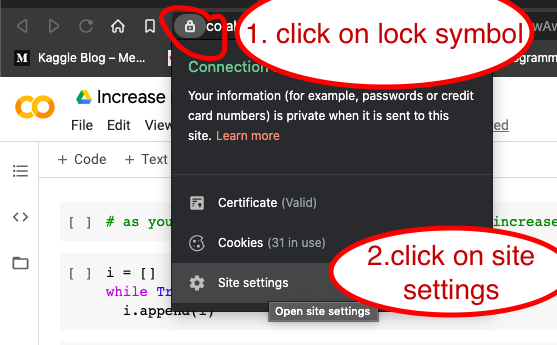

In [ ]:
#step-1

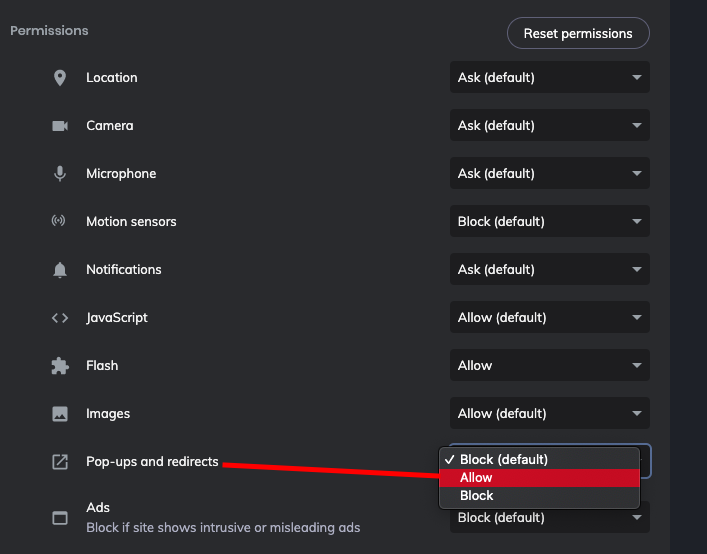

In [ ]:
#step-2